In [1]:
import sys

sys.path.append("..")

In [2]:
from qurious.environments import GridWorld

env = GridWorld(
    width=5, height=5, start_pos=(0, 0), goal_pos=[(4, 4)], obstacles=[(1, 1), (2, 2), (3, 3)], step_penalty=0.1
)

print(env.render())

A . . . .
. # . . .
. . # . .
. . . # .
. . . . G



In [5]:
# create agent with e-greedy policy

from qurious.agents import SarsaAgent
from qurious.policy import DeterministicTabularPolicy, EpsilonGreedyPolicy
from qurious.value_fns import TabularActionValueFunction

# Create agent components
n_states = env.get_num_states()
n_actions = env.get_num_actions()

# Q-function
q_function = TabularActionValueFunction(n_states, n_actions)

# Base policy (will be updated based on Q-values)
base_policy = DeterministicTabularPolicy(n_states, n_actions)

# Epsilon-greedy exploration policy
epsilon = 0.5
policy = EpsilonGreedyPolicy(base_policy, epsilon, decay_rate=0.99)

# Create agent
agent = SarsaAgent(policy, q_function, gamma=0.99)
agent.enable_experience_tracking()

(<Figure size 750x750 with 1 Axes>, <Axes: >)

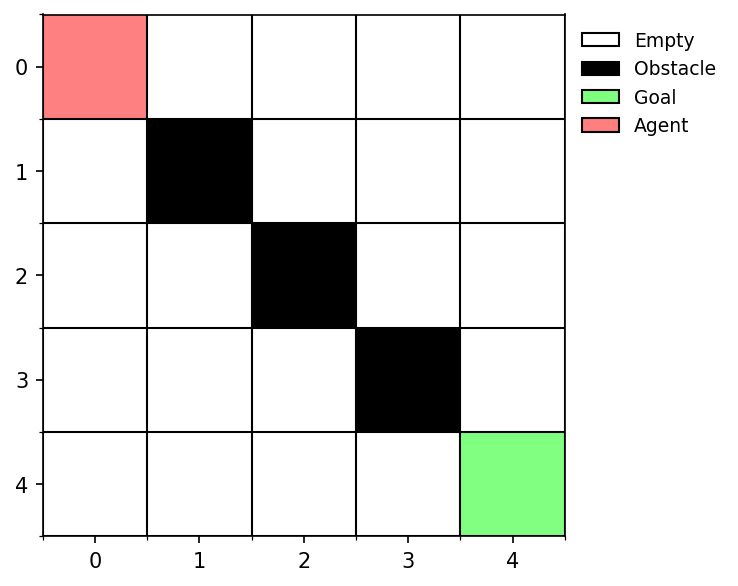

In [24]:
# create visualization

from qurious.visualization import GridWorldVisualizer, AgentLayer, GridLayer

viz = GridWorldVisualizer(env, theme="light")
viz.render_matplotlib(figsize=(5, 5), dpi=150)


In [8]:
from qurious.utils import train_agent

train_agent(env, agent, num_episodes=1000)